"Adapted from the Google Colab notebook: Train_TFLite2_Object_Detection_Model.ipynb by Evan Juras (Edje Electronics)."

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Step 1: Set Up TensorFlow Object Detection Environment

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
# Remove Cython to fix import issues temporarily
!pip uninstall Cython -y
# Clone TensorFlow models repository (shallow clone)
!git clone --depth 1 https://github.com/tensorflow/models

Found existing installation: Cython 3.1.1
Uninstalling Cython-3.1.1:
  Successfully uninstalled Cython-3.1.1
Cloning into 'models'...
remote: Enumerating objects: 4349, done.
remote: Counting objects: 100% (4349/4349), done.
remote: Compressing objects: 100% (3157/3157), done.
remote: Total 4349 (delta 1187), reused 4046 (delta 1119), pack-reused 0 (from 0)
Receiving objects: 100% (4349/4349), 53.68 MiB | 4.05 MiB/s, done.
Resolving deltas: 100% (1187/1187), done.


In [ ]:
!pip install protobuf==3.20.*

In [ ]:
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
#cp object_detection/packages/tf2/setup.py .

In [ ]:
# Update setup.py to specify tf-models-official version 2.8.0 for compatibility
import re
with open('/content/models/research/object_detection/packages/tf2/setup.py') as f:
    s = f.read()

with open('/content/models/research/setup.py', 'w') as f:
    # Replace version requirement for tf-models-official package
    s = re.sub('tf-models-official>=2.5.1',
               'tf-models-official==2.8.0', s)
    f.write(s)


In [ ]:
# Fix PyYAML version issue by installing v5.3
!pip install pyyaml==5.3
# Install the Object Detection API package
!pip install /content/models/research/

Processing ./models/research
  Preparing metadata (setup.py) ... done
  Using cached cython-3.1.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.5 kB)
Using cached cython-3.1.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.3 MB)
  Created wheel for object_detection: filename=object_detection-0.1-py3-none-any.whl size=1697321 sha256=e9df2b108566d5fdd9033ed5d30602bb7dbf2ab850b823261d54d5e5b075ffd8
  Stored in directory: /tmp/pip-ephem-wheel-cache-1yuwl0yv/wheels/53/dd/70/2de274d6c443c69d367bd6a5606f95e5a6df61aacf1435ec0d
Successfully built object_detection
  Attempting uninstall: object_detection
    Found existing installation: object_detection 0.1
    Uninstalling object_detection-0.1:
      Successfully uninstalled object_detection-0.1


In [ ]:
# Downgrade TensorFlow to v2.8.0 for Colab compatibility
!pip install tensorflow==2.8.0
# Install compatible tensorflow_io version
!pip install tensorflow_io==0.23.1

In [ ]:
# Download and set up CUDA 11.0 repository for Ubuntu 18.04
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-ubuntu1804.pin
!mv cuda-ubuntu1804.pin /etc/apt/preferences.d/cuda-repository-pin-600

# Download and install local CUDA 11.0 package
!wget http://developer.download.nvidia.com/compute/cuda/11.0.2/local_installers/cuda-repo-ubuntu1804-11-0-local_11.0.2-450.51.05-1_amd64.deb
!dpkg -i cuda-repo-ubuntu1804-11-0-local_11.0.2-450.51.05-1_amd64.deb

# Add CUDA apt key, update package list, and install CUDA toolkit 11.0
!apt-key add /var/cuda-repo-ubuntu1804-11-0-local/7fa2af80.pub
!apt-get update && sudo apt-get install cuda-toolkit-11-0

# Add CUDA 11.0 library path to environment variable
!export LD_LIBRARY_PATH=/usr/local/cuda-11.0/lib64:$LD_LIBRARY_PATH

--2025-06-02 01:37:00--  https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-ubuntu1804.pin
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 119.110.115.137, 119.110.115.139, 119.110.115.139, ...
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|119.110.115.137|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 190 [application/octet-stream]
Saving to: ‘cuda-ubuntu1804.pin’

cuda-ubuntu1804.pin 100%[===================>]     190  --.-KB/s    in 0s      

2025-06-02 01:37:01 (77.1 MB/s) - ‘cuda-ubuntu1804.pin’ saved [190/190]

--2025-06-02 01:37:01--  http://developer.download.nvidia.com/compute/cuda/11.0.2/local_installers/cuda-repo-ubuntu1804-11-0-local_11.0.2-450.51.05-1_amd64.deb
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 119.110.115.137, 119.110.115.139, 119.110.115.139, ...
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)

In [ ]:
# Run model builder test script to ensure setup is correct
!python /content/models/research/object_detection/builders/model_builder_tf2_test.py

Running tests under Python 3.10.12: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2025-06-02 02:17:01.846789: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
/usr/local/lib/python3.10/dist-packages/object_detection/builders/model_builder.py:1112: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  logging.warn(('Building experimental DeepMAC meta-arch.'
W0602 02:17:02.014467 140639930606720 model_builder.py:1112] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 1.07s
I0602 02:17:02.283210 140639930606720 test_util.py:2373] time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 1.07s
[       OK ] ModelBuilderTF2Test.test_create_center_net_deepmac
[ RUN      ] ModelBuilder

# Step 2: Prepare the Dataset

There are two methods to transfer your image files into this Colab session.

Option 1: Transfer Files from Google Drive

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

# # Copy the images.zip file from the 'dataset' folder in your Google Drive to the Colab working directory
# # Replace the path to match the actual location of your zip file in Google Drive
# !cp /content/gdrive/MyDrive/dataset/kemunify-images-labeled.zip /content

Option 2: Upload via Google Colab interface

Simply drag and drop the `kemunify-images-labeled.zip` file into the “Files” tab on the left side of the Colab interface to upload it to the session storage.

In [ ]:
# Unzip your dataset into the /content/dataset folder.
# Make sure to replace kemunify-images-labeled.zip with the actual name of your ZIP file if it's different.
!mkdir /content/dataset
!unzip -q -o kemunify-images-labeled.zip -d /content/dataset/all
!mkdir /content/dataset/train; mkdir /content/dataset/validation; mkdir -p /content/dataset/test

### Set Up Label Map and Convert to TFRecords


List your class names (e.g., plastic, metal) in labelmap.txt, one per line. Then run the script to convert your dataset into TFRecord format for TensorFlow training.

In [ ]:
### Generates a labelmap.txt file that defines the object classes for detection.
%%bash
cat <<EOF >> /content/labelmap.txt
plastic_bottle
plastic_cup
aluminum_can
metal_can
scrap_cardboard
cardboard
clear_glass
stained_glass
bottle_cap
EOF

In [ ]:
!wget https://raw.githubusercontent.com/ZyDorgGH/kemunify/main/dataset/data_split.py
!python data_split.py

--2025-06-02 02:17:39--  https://raw.githubusercontent.com/ZyDorgGH/kemunify/main/dataset/data_split.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3324 (3.2K) [text/plain]
Saving to: ‘data_split.py’

data_split.py       100%[===================>]   3.25K  --.-KB/s    in 0s      

2025-06-02 02:17:40 (57.1 MB/s) - ‘data_split.py’ saved [3324/3324]

Total train: 1772
Total val: 379
Total test: 384


In [ ]:
# Download data conversion scripts
! wget https://raw.githubusercontent.com/ZyDorgGH/kemunify/main/dataset/create_csv.py
! wget https://raw.githubusercontent.com/ZyDorgGH/kemunify/main/dataset/create_tfrecord.py

--2025-06-02 02:06:41--  https://raw.githubusercontent.com/ZyDorgGH/kemunify/main/dataset/create_csv.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1367 (1.3K) [text/plain]
Saving to: ‘create_csv.py’

create_csv.py       100%[===================>]   1.33K  --.-KB/s    in 0s      

2025-06-02 02:06:41 (113 MB/s) - ‘create_csv.py’ saved [1367/1367]

--2025-06-02 02:06:41--  https://raw.githubusercontent.com/ZyDorgGH/kemunify/main/dataset/create_tfrecord.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4501 (4.4K) [text/plain]


In [ ]:
# Create CSV data files and TFRecord files
!python3 create_csv.py

!python3 create_tfrecord.py --csv_input=dataset/train_labels.csv --labelmap=labelmap.txt --image_dir=dataset/train --output_path=train.tfrecord
!python3 create_tfrecord.py --csv_input=dataset/validation_labels.csv --labelmap=labelmap.txt --image_dir=dataset/validation --output_path=val.tfrecord

Successfully converted xml to csv.
Successfully converted xml to csv.
Successfully created the TFRecords: /content/train.tfrecord
Successfully created the TFRecords: /content/val.tfrecord


In [ ]:
# Save the paths of the TFRecord and labelmap files in variables for use later in this Colab session.
train_record_fname = '/content/train.tfrecord'
val_record_fname = '/content/val.tfrecord'
label_map_pbtxt_fname = '/content/labelmap.pbtxt'

# Step 3: Prepare The Training

In [ ]:
# Choose the model to use
chosen_model = 'ssd-mobilenet-v2'

# Model configuration for SSD MobileNet V2
model_name = 'ssd_mobilenet_v2_320x320_coco17_tpu-8'
base_pipeline_file = 'ssd_mobilenet_v2_320x320_coco17_tpu-8.config'
pretrained_checkpoint = 'ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz'

Run the next section to download the pretrained model and config files.

In [ ]:
# Create "mymodel" folder for holding pre-trained weights and configuration files
%mkdir /content/models/mymodel/
%cd /content/models/mymodel/

# Download pre-trained model weights
import tarfile
download_tar = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/' + pretrained_checkpoint
!wget {download_tar}
tar = tarfile.open(pretrained_checkpoint)
tar.extractall()
tar.close()

# Download training configuration file for model
download_config = 'https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/configs/tf2/' + base_pipeline_file
!wget {download_config}

/content/models/mymodel
--2025-06-02 02:18:13--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 34.101.5.59, 34.101.5.123, 34.128.10.59, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|34.101.5.59|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46042990 (44M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_32 100%[===================>]  43.91M  3.93MB/s    in 11s     

2025-06-02 02:18:24 (4.12 MB/s) - ‘ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz’ saved [46042990/46042990]

--2025-06-02 02:18:24--  https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/configs/tf2/ssd_mobilenet_v2_320x320_coco17_tpu-8.config
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connectin

In [ ]:
# Set training parameters for the model
num_steps = 40000

batch_size = 16

In [ ]:
# Set file locations and get number of classes for config file
pipeline_fname = '/content/models/mymodel/' + base_pipeline_file
fine_tune_checkpoint = '/content/models/mymodel/' + model_name + '/checkpoint/ckpt-0'

def get_num_classes(pbtxt_fname):
    from object_detection.utils import label_map_util
    label_map = label_map_util.load_labelmap(pbtxt_fname)
    categories = label_map_util.convert_label_map_to_categories(
        label_map, max_num_classes=90, use_display_name=True)
    category_index = label_map_util.create_category_index(categories)
    return len(category_index.keys())
num_classes = get_num_classes(label_map_pbtxt_fname)
print('Total classes:', num_classes)

Total classes: 9


In [ ]:
# Create custom configuration file by writing the dataset, model checkpoint, and training parameters into the base pipeline file
import re

%cd /content/models/mymodel
print('writing custom configuration file')

with open(pipeline_fname) as f:
    s = f.read()
with open('pipeline_file.config', 'w') as f:

    # Set fine_tune_checkpoint path
    s = re.sub('fine_tune_checkpoint: ".*?"',
               'fine_tune_checkpoint: "{}"'.format(fine_tune_checkpoint), s)

    # Set tfrecord files for train and test datasets
    s = re.sub(
        '(input_path: ".*?)(PATH_TO_BE_CONFIGURED/train)(.*?")', 'input_path: "{}"'.format(train_record_fname), s)
    s = re.sub(
        '(input_path: ".*?)(PATH_TO_BE_CONFIGURED/val)(.*?")', 'input_path: "{}"'.format(val_record_fname), s)

    # Set label_map_path
    s = re.sub(
        'label_map_path: ".*?"', 'label_map_path: "{}"'.format(label_map_pbtxt_fname), s)

    # Set batch_size
    s = re.sub('batch_size: [0-9]+',
               'batch_size: {}'.format(batch_size), s)

    # Set training steps, num_steps
    s = re.sub('num_steps: [0-9]+',
               'num_steps: {}'.format(num_steps), s)

    # Set number of classes num_classes
    s = re.sub('num_classes: [0-9]+',
               'num_classes: {}'.format(num_classes), s)

    # Change fine-tune checkpoint type from "classification" to "detection"
    s = re.sub(
        'fine_tune_checkpoint_type: "classification"', 'fine_tune_checkpoint_type: "{}"'.format('detection'), s)

    # If using ssd-mobilenet-v2, reduce learning rate (because it's too high in the default config file)
    if chosen_model == 'ssd-mobilenet-v2':
      s = re.sub('learning_rate_base: .8',
                 'learning_rate_base: .08', s)

      s = re.sub('warmup_learning_rate: 0.13333',
                 'warmup_learning_rate: .026666', s)
    f.write(s)


/content/models/mymodel
writing custom configuration file


In [ ]:
# Show the contents of the custom configuration file
!cat /content/models/mymodel/pipeline_file.config

# SSD with Mobilenet v2
# Trained on COCO17, initialized from Imagenet classification checkpoint
# Train on TPU-8
#
# Achieves 22.2 mAP on COCO17 Val

model {
  ssd {
    inplace_batchnorm_update: true
    freeze_batchnorm: false
    num_classes: 9
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
        width_scale: 5.0
      }
    }
    matcher {
      argmax_matcher {
        matched_threshold: 0.5
        unmatched_threshold: 0.5
        ignore_thresholds: false
        negatives_lower_than_unmatched: true
        force_match_for_each_row: true
        use_matmul_gather: true
      }
    }
    similarity_calculator {
      iou_similarity {
      }
    }
    encode_background_as_zeros: true
    anchor_generator {
      ssd_anchor_generator {
        num_layers: 6
        min_scale: 0.2
        max_scale: 0.95
        aspect_ratios: 1.0
        aspect_ratios: 2.0
        aspect_ratios: 0.5
        aspect_ratios: 3.0
 

In [ ]:
# Define the custom config file path and the folder for saving training checkpoints
pipeline_file = '/content/models/mymodel/pipeline_file.config'
model_dir = '/content/training/'

# Step 4: Start Tranning

In [ ]:
!kill 2634

/bin/bash: line 1: kill: (247) - No such process


In [ ]:
%load_ext tensorboard
%tensorboard --logdir '/content/training/train' --port=6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


<IPython.core.display.Javascript object>

In [ ]:
import os
!nvidia-smi

Mon Jun  2 01:59:08 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.133.07             Driver Version: 572.83         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060 Ti     On  |   00000000:01:00.0  On |                  N/A |
| 34%   54C    P5             28W /  225W |    1454MiB /   8192MiB |     26%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# Run training!
!python /content/models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path={pipeline_file} \
    --model_dir={model_dir} \
    --alsologtostderr \
    --num_train_steps={num_steps} \
    --sample_1_of_n_eval_examples=1

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.13.0 and strictly below 2.16.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.8.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're us

# Step 5: Convert the model to TFLite format for mobile or edge deployment.

In [ ]:
# Make a directory to store the trained TFLite model
!mkdir /content/kemunify_model
output_directory = '/content/kemunify_model'

# Path to training directory (the conversion script automatically chooses the highest checkpoint file)
last_model_path = '/content/training'

!python /content/models/research/object_detection/export_tflite_graph_tf2.py \
    --trained_checkpoint_dir {last_model_path} \
    --output_directory {output_directory} \
    --pipeline_config_path {pipeline_file}

2025-06-02 04:49:37.731981: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0602 04:49:42.800364 140252040434816 api.py:441] feature_map_spatial_dims: [(19, 19), (10, 10), (5, 5), (3, 3), (2, 2), (1, 1)]
INFO:tensorflow:depth of additional conv before box predictor: 0
I0602 04:49:45.878839 140252040434816 convolutional_keras_box_predictor.py:152] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0602 04:49:45.879134 140252040434816 convolutional_keras_box_predictor.py:152] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0602 04:49:45.879282 140252040434816 convolutional_keras_box_predictor.py:152] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0602 

In [ ]:
# Convert exported graph file into TFLite model file
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_saved_model('/content/kemunify_model/saved_model')
tflite_model = converter.convert()

with open('/content/kemunify_model/kemunify_mobilnet_model.tflite', 'wb') as f:
  f.write(tflite_model)

# Step 6: Test TensorFlow Lite model performance and compute mAP (mean Average Precision).

## Inference on sample images

In [ ]:
# Script to run custom TFLite model on test images to detect objects
# Source: https://github.com/EdjeElectronics/TensorFlow-Lite-Object-Detection-on-Android-and-Raspberry-Pi/blob/master/TFLite_detection_image.py

import os
import cv2
import numpy as np
import sys
import glob
import random
import importlib.util
from tensorflow.lite.python.interpreter import Interpreter

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

### Define function for inferencing with TFLite model and displaying results

def tflite_detect_images(modelpath, imgpath, lblpath, min_conf=0.5, num_test_images=10, savepath='/content/results', txt_only=False):

  # Grab filenames of all images in test folder
  images = glob.glob(imgpath + '/*.jpg') + glob.glob(imgpath + '/*.JPG') + glob.glob(imgpath + '/*.png') + glob.glob(imgpath + '/*.bmp')

  # Load the label map into memory
  with open(lblpath, 'r') as f:
      labels = [line.strip() for line in f.readlines()]

  # Load the Tensorflow Lite model into memory
  interpreter = Interpreter(model_path=modelpath)
  interpreter.allocate_tensors()

  # Get model details
  input_details = interpreter.get_input_details()
  output_details = interpreter.get_output_details()
  height = input_details[0]['shape'][1]
  width = input_details[0]['shape'][2]

  float_input = (input_details[0]['dtype'] == np.float32)

  input_mean = 127.5
  input_std = 127.5

  # Randomly select test images
  images_to_test = random.sample(images, num_test_images)

  # Loop over every image and perform detection
  for image_path in images_to_test:

      # Load image and resize to expected shape [1xHxWx3]
      image = cv2.imread(image_path)
      image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      imH, imW, _ = image.shape
      image_resized = cv2.resize(image_rgb, (width, height))
      input_data = np.expand_dims(image_resized, axis=0)

      # Normalize pixel values if using a floating model (i.e. if model is non-quantized)
      if float_input:
          input_data = (np.float32(input_data) - input_mean) / input_std

      # Perform the actual detection by running the model with the image as input
      interpreter.set_tensor(input_details[0]['index'],input_data)
      interpreter.invoke()

      # Retrieve detection results
      boxes = interpreter.get_tensor(output_details[1]['index'])[0] # Bounding box coordinates of detected objects
      classes = interpreter.get_tensor(output_details[3]['index'])[0] # Class index of detected objects
      scores = interpreter.get_tensor(output_details[0]['index'])[0] # Confidence of detected objects

      detections = []

      # Loop over all detections and draw detection box if confidence is above minimum threshold
      for i in range(len(scores)):
          if ((scores[i] > min_conf) and (scores[i] <= 1.0)):

              # Get bounding box coordinates and draw box
              # Interpreter can return coordinates that are outside of image dimensions, need to force them to be within image using max() and min()
              ymin = int(max(1,(boxes[i][0] * imH)))
              xmin = int(max(1,(boxes[i][1] * imW)))
              ymax = int(min(imH,(boxes[i][2] * imH)))
              xmax = int(min(imW,(boxes[i][3] * imW)))

              cv2.rectangle(image, (xmin,ymin), (xmax,ymax), (10, 255, 0), 2)

              # Draw label
              object_name = labels[int(classes[i])] # Look up object name from "labels" array using class index
              label = '%s: %d%%' % (object_name, int(scores[i]*100)) # Example: 'person: 72%'
              labelSize, baseLine = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.7, 2) # Get font size
              label_ymin = max(ymin, labelSize[1] + 10) # Make sure not to draw label too close to top of window
              cv2.rectangle(image, (xmin, label_ymin-labelSize[1]-10), (xmin+labelSize[0], label_ymin+baseLine-10), (255, 255, 255), cv2.FILLED) # Draw white box to put label text in
              cv2.putText(image, label, (xmin, label_ymin-7), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2) # Draw label text

              detections.append([object_name, scores[i], xmin, ymin, xmax, ymax])


      # All the results have been drawn on the image, now display the image
      if txt_only == False: # "text_only" controls whether we want to display the image results or just save them in .txt files
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(12,16))
        plt.imshow(image)
        plt.show()

      # Save detection results in .txt files (for calculating mAP)
      elif txt_only == True:

        # Get filenames and paths
        image_fn = os.path.basename(image_path)
        base_fn, ext = os.path.splitext(image_fn)
        txt_result_fn = base_fn +'.txt'
        txt_savepath = os.path.join(savepath, txt_result_fn)

        # Write results to text file
        # (Using format defined by https://github.com/Cartucho/mAP, which will make it easy to calculate mAP)
        with open(txt_savepath,'w') as f:
            for detection in detections:
                f.write('%s %.4f %d %d %d %d\n' % (detection[0], detection[1], detection[2], detection[3], detection[4], detection[5]))

  return

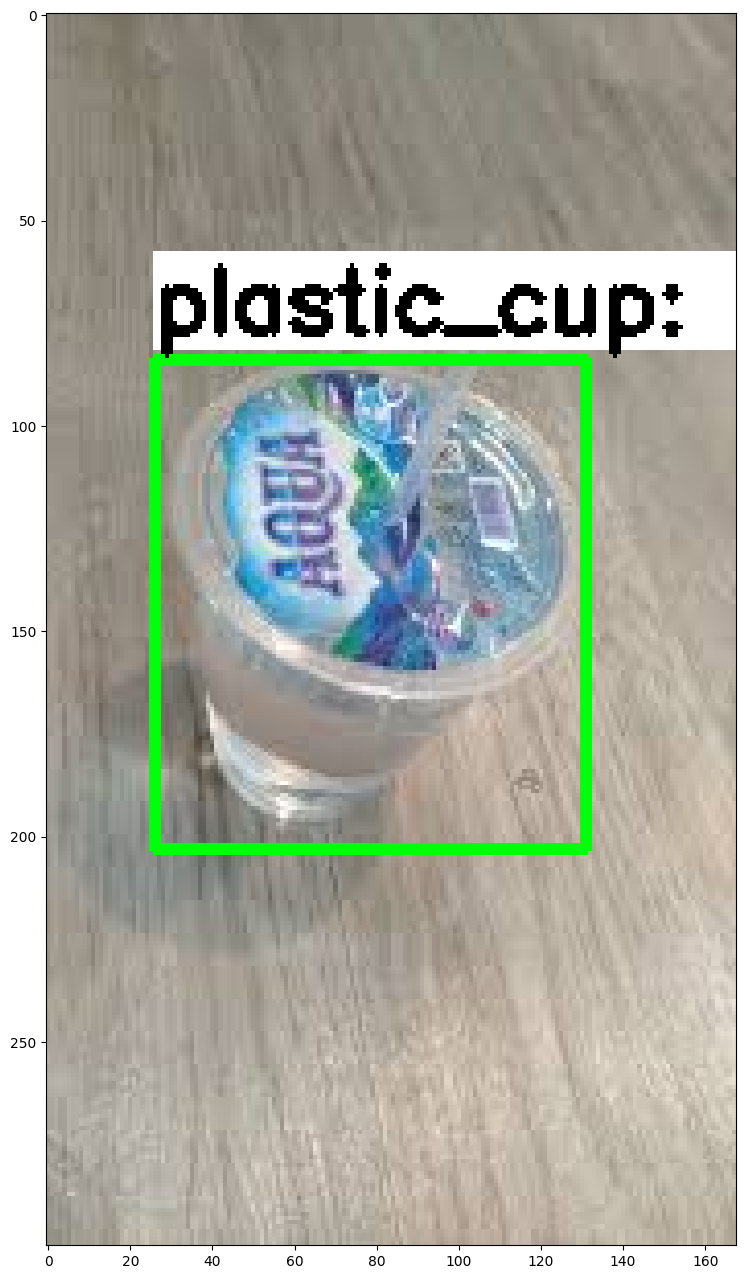

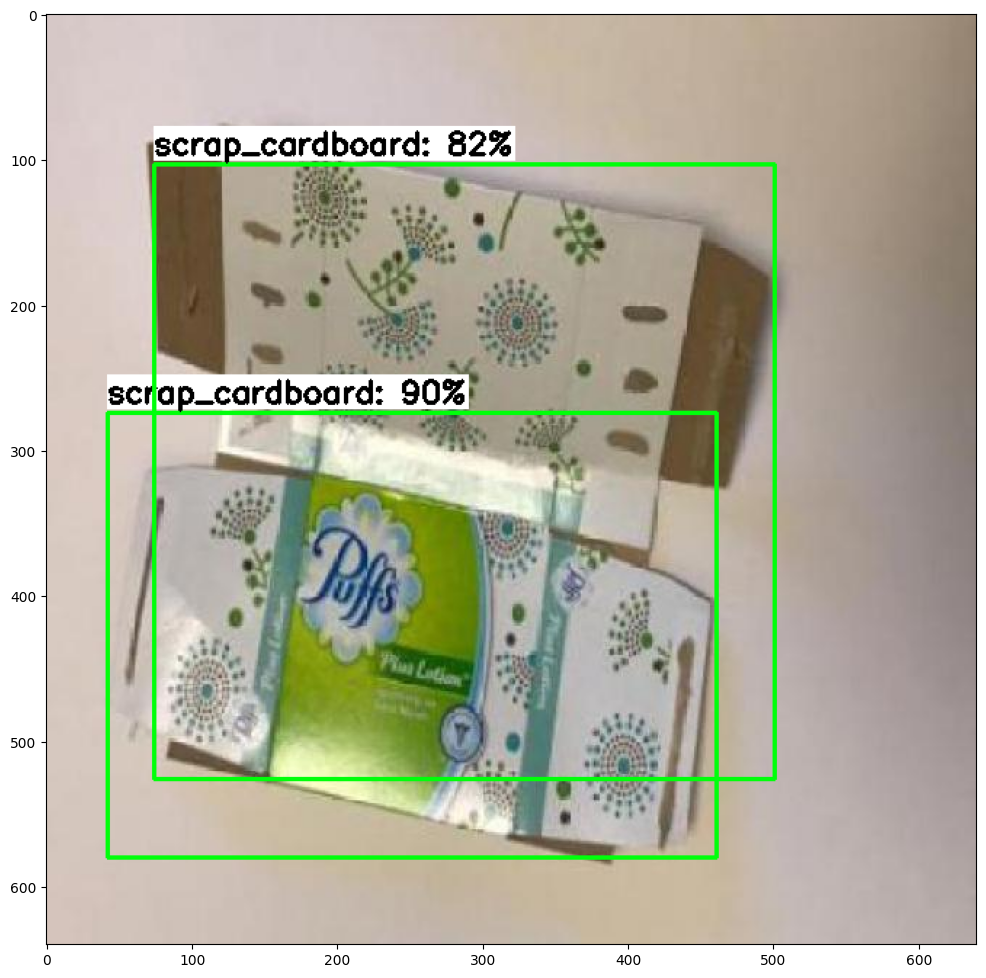

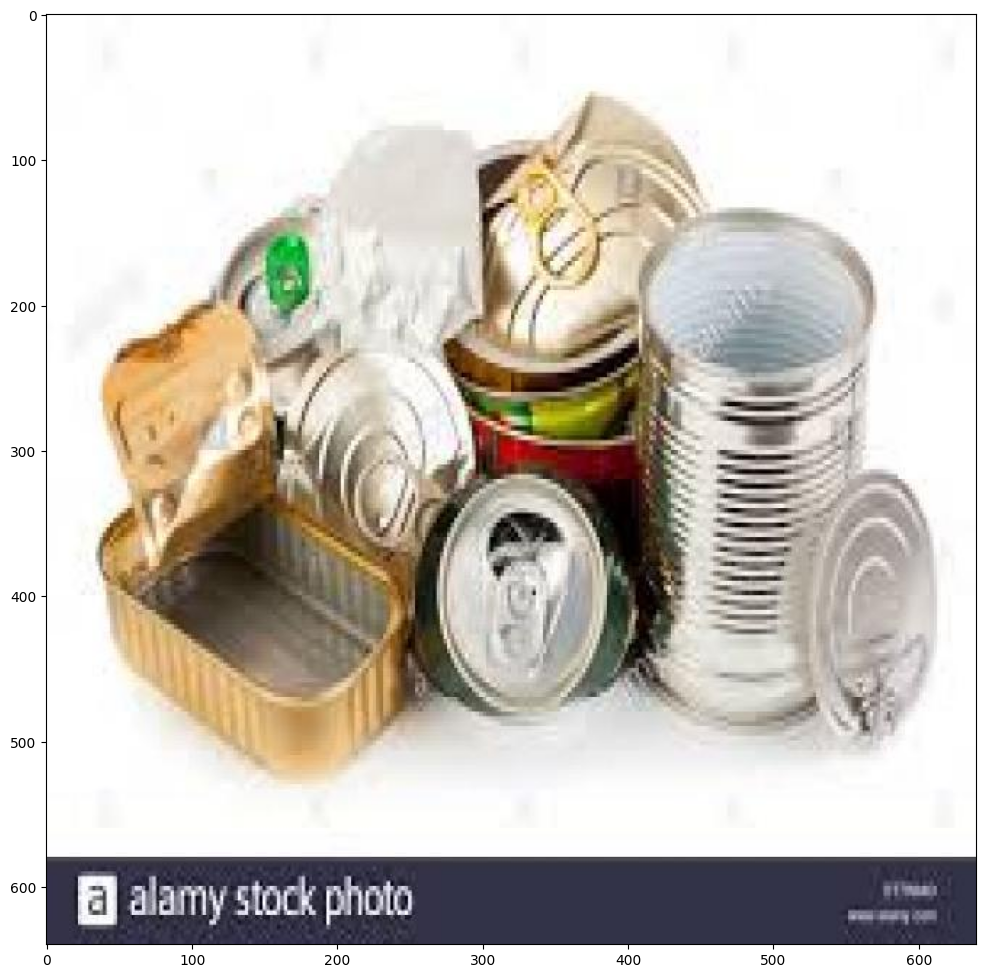

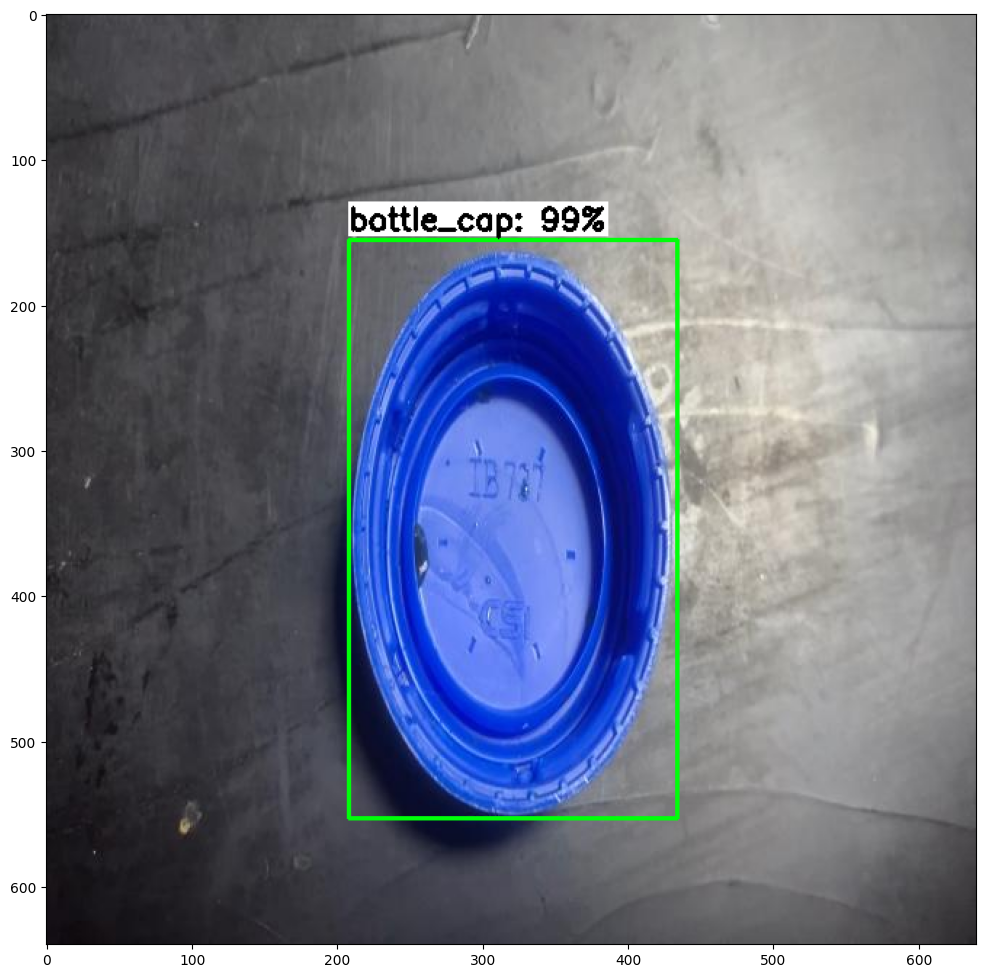

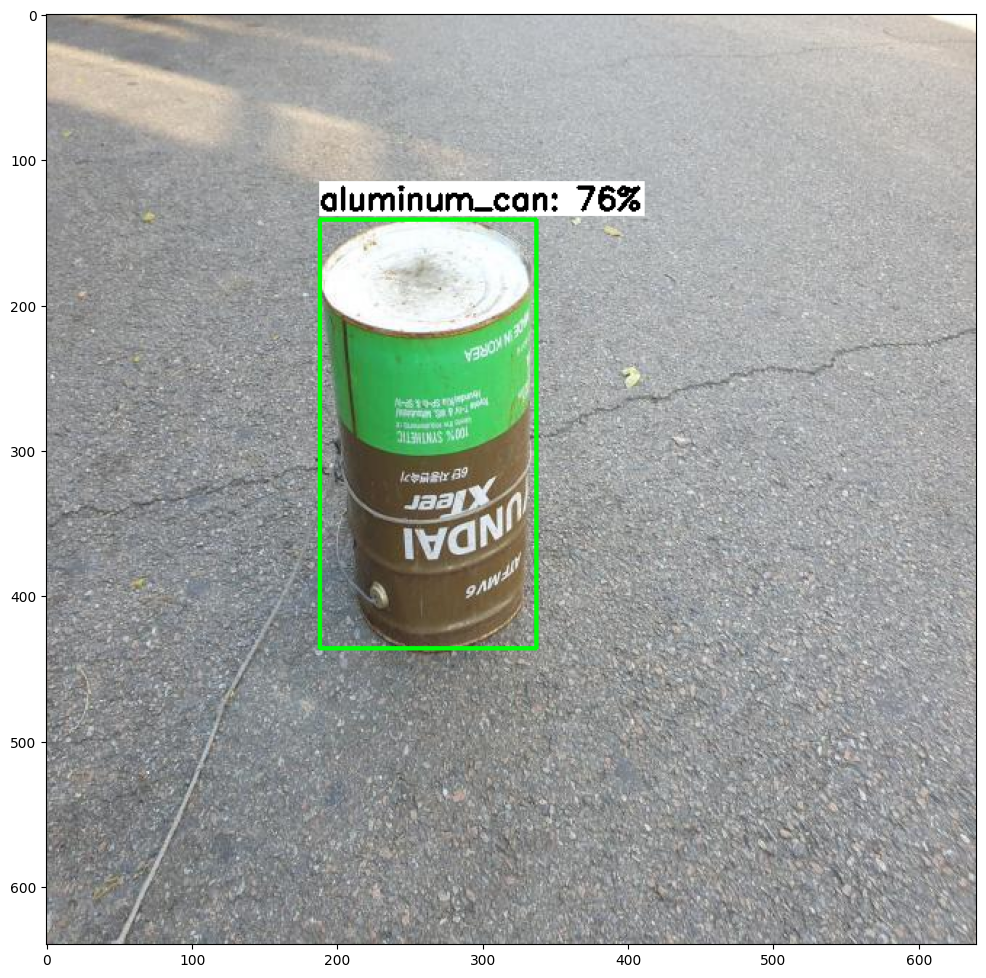

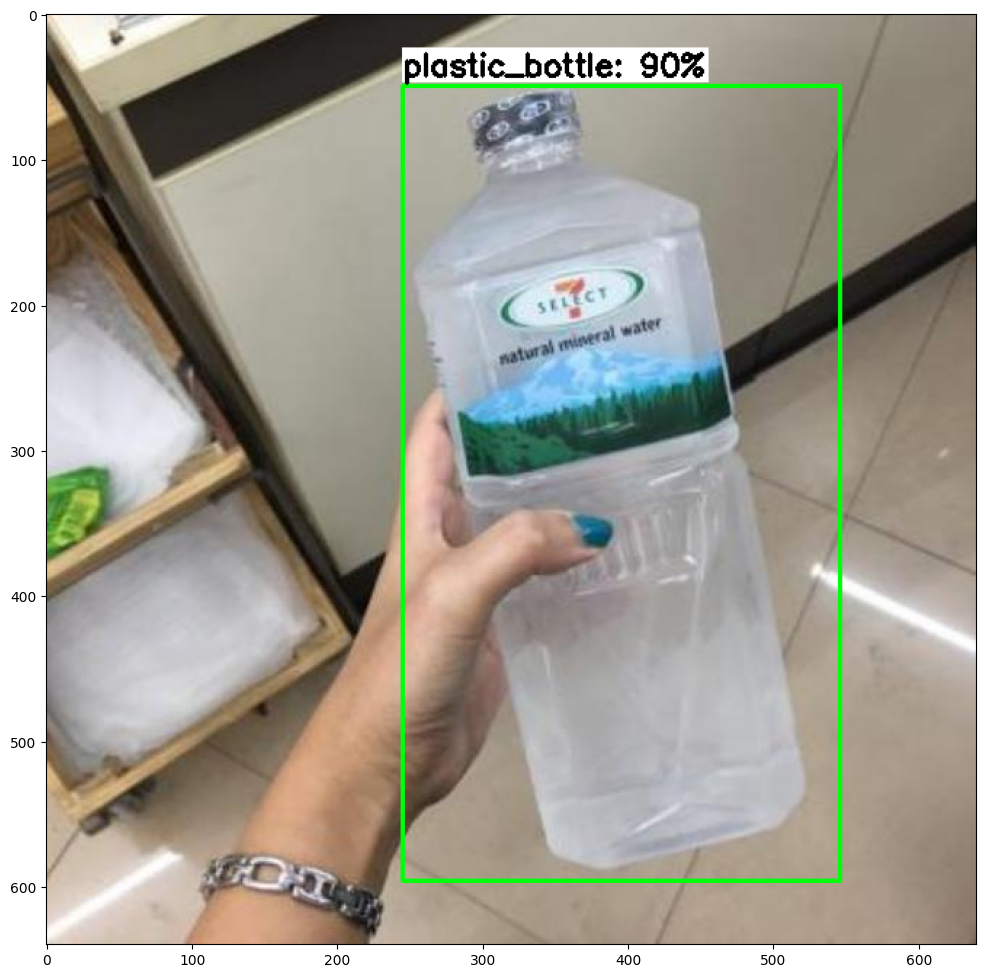

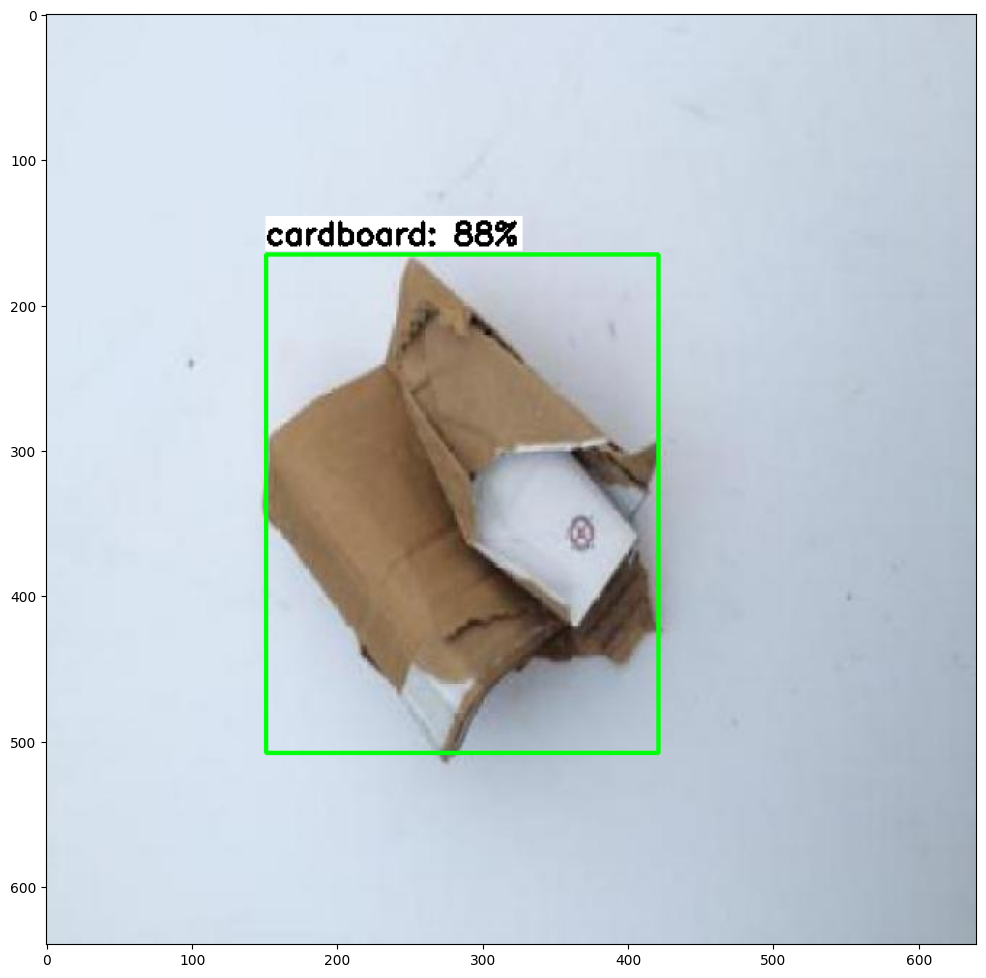

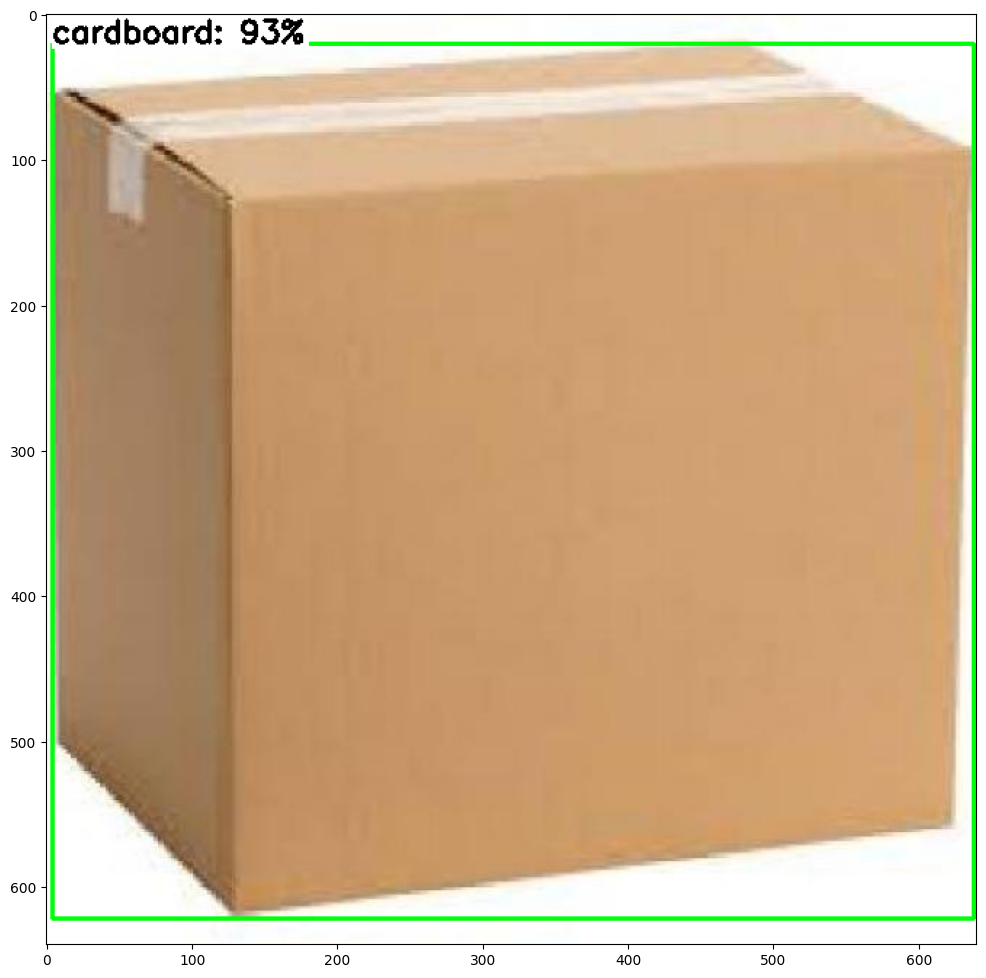

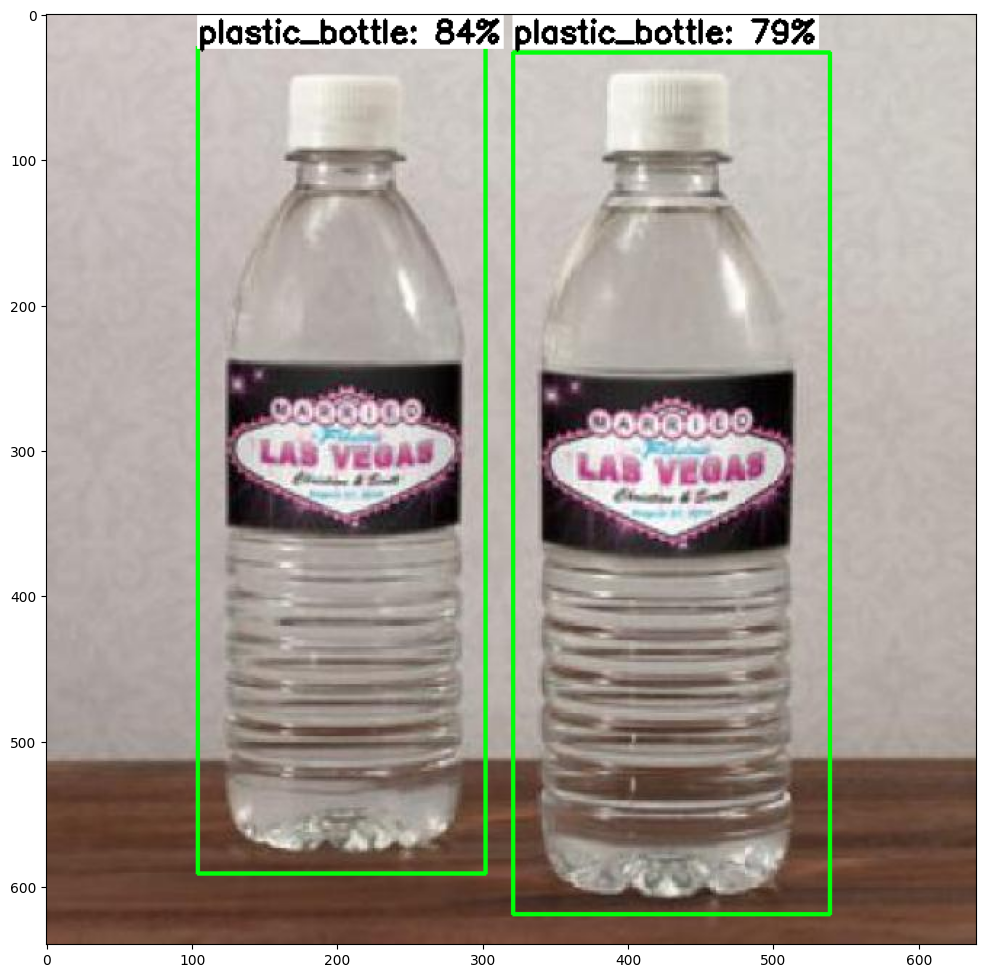

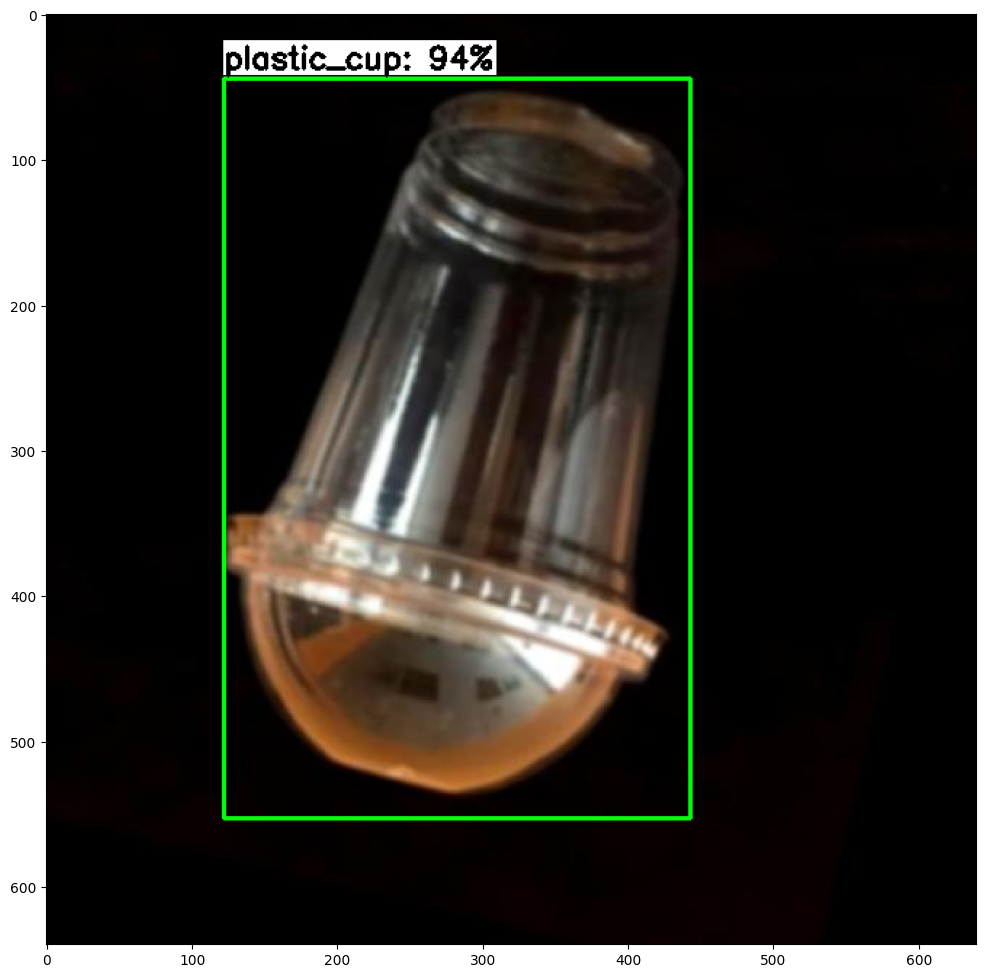

In [ ]:
# Set up variables for running user's model
PATH_TO_IMAGES='/content/dataset/test' # Path to test images folder
PATH_TO_MODEL='/content/kemunify_model/kemunify_mobilnet_model.tflite' # Path to .tflite model file
PATH_TO_LABELS='/content/labelmap.txt' # Path to labelmap.txt file
min_conf_threshold=0.5 # Confidence threshold (try changing this to 0.01 if you don't see any detection results)
images_to_test = 10 # Number of images to run detection on

# Run inferencing function!
tflite_detect_images(PATH_TO_MODEL, PATH_TO_IMAGES, PATH_TO_LABELS, min_conf_threshold, images_to_test)

## Measure mAP

In [ ]:
%%bash

# Pindah ke direktori /content yang baru dibuat setelah restar

# Clone ulang
git clone https://github.com/Cartucho/mAP /content/mAP

# Masuk ke direktori
cd /content/mAP

# Bersihkan file input jika ada
rm -f input/detection-results/*
rm -f input/ground-truth/*
rm -f input/images-optional/*

# Download ulang script
wget -O calculate_map_cartucho.py https://raw.githubusercontent.com/EdjeElectronics/TensorFlow-Lite-Object-Detection-on-Android-and-Raspberry-Pi/master/util_scripts/calculate_map_cartucho.py

fatal: destination path '/content/mAP' already exists and is not an empty directory.
--2025-06-02 05:36:53--  https://raw.githubusercontent.com/EdjeElectronics/TensorFlow-Lite-Object-Detection-on-Android-and-Raspberry-Pi/master/util_scripts/calculate_map_cartucho.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5397 (5.3K) [text/plain]
Saving to: ‘calculate_map_cartucho.py’

     0K .....                                                 100% 69.2M=0s

2025-06-02 05:36:54 (69.2 MB/s) - ‘calculate_map_cartucho.py’ saved [5397/5397]



In [ ]:
!cp /content/dataset/test/* /content/mAP/input/images-optional # Copy images and xml files
!mv /content/mAP/input/images-optional/*.xml /content/mAP/input/ground-truth/  # Move xml files to the appropriate folder

In [ ]:
!python /content/mAP/scripts/extra/convert_gt_xml.py

Conversion completed!


In [ ]:
# Set up variables for running inference, this time to get detection results saved as .txt files
PATH_TO_IMAGES='/content/dataset/test'   # Path to test images folder
PATH_TO_MODEL='/content/kemunify_model/kemunify_mobilnet_model.tflite'   # Path to .tflite model file
PATH_TO_LABELS='/content/labelmap.txt'   # Path to labelmap.txt file
PATH_TO_RESULTS='/content/mAP/input/detection-results' # Folder to save detection results in
min_conf_threshold=0.5   # Confidence threshold

# Use all the images in the test folder
image_list = glob.glob(PATH_TO_IMAGES + '/*.jpg') + glob.glob(PATH_TO_IMAGES + '/*.JPG') + glob.glob(PATH_TO_IMAGES + '/*.png') + glob.glob(PATH_TO_IMAGES + '/*.bmp')
images_to_test = min(500, len(image_list)) # If there are more than 500 images in the folder, just use 500

# Tell function to just save results and not display images
txt_only = True

# Run inferencing function!
print('Starting inference on %d images...' % images_to_test)
tflite_detect_images(PATH_TO_MODEL, PATH_TO_IMAGES, PATH_TO_LABELS, min_conf_threshold, images_to_test, PATH_TO_RESULTS, txt_only)
print('Finished inferencing!')

Starting inference on 384 images...
Finished inferencing!


In [ ]:
%cd /content/mAP
!python calculate_map_cartucho.py --labels=/content/labelmap.txt

/content/mAP
Calculating mAP at 0.50 IoU threshold...
84.99% = aluminum_can AP 
100.00% = bottle_cap AP 
83.79% = cardboard AP 
72.78% = clear_glass AP 
81.10% = metal_can AP 
95.53% = plastic_bottle AP 
92.50% = plastic_cup AP 
77.89% = scrap_cardboard AP 
100.00% = stained_glass AP 
mAP = 87.62%

***mAP Results***

Class		Average mAP @ 0.5
---------------------------------------
plastic_bottle		95.53%
plastic_cup		92.50%
aluminum_can		84.99%
metal_can		81.10%
scrap_cardboard		77.89%
cardboard		83.79%
clear_glass		72.78%
stained_glass		100.00%
bottle_cap		100.00%

Overall		87.62%


# Step 7: Metadata to TFLite Model

In [ ]:
%cd /content

/content


In [ ]:
!pip install tflite_support

In [ ]:
# Download TFLite Metadata Writer Script
!wget https://raw.githubusercontent.com/ZyDorgGH/kemunify/main/dataset/metadata_writter_API.py

--2025-05-30 01:14:03--  https://raw.githubusercontent.com/ZyDorgGH/kemunify/main/dataset/metadata_writter_API.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1188 (1.2K) [text/plain]
Saving to: ‘metadata_writter_API.py.1’

metadata_writter_AP 100%[===================>]   1.16K  --.-KB/s    in 0s      

2025-05-30 01:14:04 (167 MB/s) - ‘metadata_writter_API.py.1’ saved [1188/1188]



In [ ]:
!python metadata_writter_API.py

{
  "name": "ObjectDetector",
  "description": "Identify which of a known set of objects might be present and provide information about their positions within the given image or a video stream.",
  "subgraph_metadata": [
    {
      "input_tensor_metadata": [
        {
          "name": "image",
          "description": "Input image to be detected.",
          "content": {
            "content_properties_type": "ImageProperties",
            "content_properties": {
              "color_space": "RGB"
            }
          },
          "process_units": [
            {
              "options_type": "NormalizationOptions",
              "options": {
                "mean": [
                  127.5
                ],
                "std": [
                  127.5
                ]
              }
            }
          ],
          "stats": {
            "max": [
              1.0
            ],
            "min": [
              -1.0
            ]
          }
        }
      ],
     

## Deploy and download model

In [ ]:
%cd /content
!zip -r kemunify_model_lite.zip kemunify_model

/content
  adding: kemunify_model/ (stored 0%)
  adding: kemunify_model/kemunify_mobilnet_model.tflite (deflated 7%)
  adding: kemunify_model/saved_model/ (stored 0%)
  adding: kemunify_model/saved_model/saved_model.pb (deflated 92%)
  adding: kemunify_model/saved_model/variables/ (stored 0%)
  adding: kemunify_model/saved_model/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: kemunify_model/saved_model/variables/variables.index (deflated 76%)
  adding: kemunify_model/saved_model/assets/ (stored 0%)
  adding: kemunify_model/kemunify_mobilnet_model_metadata.tflite (deflated 7%)


In [ ]:
from google.colab import files

files.download('/content/kemunify_model_lite.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>